In [1]:
import os
# select cuda 0
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print("CUDA available:", cuda_available)

if cuda_available:
    # Number of GPUs
    num_gpus = torch.cuda.device_count()
    print("Number of GPUs:", num_gpus)

    # List each device’s name
    for i in range(num_gpus):
        name = torch.cuda.get_device_name(i)
        print(f"GPU {i}: {name}")
else:
    print("No CUDA devices found")

CUDA available: True
Number of GPUs: 1
GPU 0: Tesla V100-PCIE-32GB


In [2]:
from buffer import DiscBuffer

buffer = DiscBuffer('/var/local/glang/activations/clt-activations.h5', 'tensor')

loader = torch.utils.data.DataLoader(
    buffer,
    num_workers=20,
    prefetch_factor=10,
    batch_size=1000,
    shuffle=True,
)

In [ ]:
from lightning.pytorch.loggers import WandbLogger
from clt import CrossLayerTranscoder
import lightning.pytorch as L


logger = WandbLogger(project='wandb_clt')
trainer = L.Trainer(logger=logger, limit_train_batches=100000)
trainer.fit(
    model=CrossLayerTranscoder(config={
        "d_acts": 768,
        "d_features": 768 * 12,
        "n_layers": 12,
        "bandwidth": 1.,
        "lambda": 0.0002,
        "c": 0.1,
        "jump_thresh": 0.03,
        "lr": 1e-3
    }),
    train_dataloaders=loader,
)

/var/local/glang/.cache/pypoetry/virtualenvs/crosslayer-transcoder-5Jm3OZ38-py3.12/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using default `ModelCheckpoint`. Consider installing `litmodels` package to enable `LitModelCheckpoint` for automatic upload to the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/var/local/glang/.cache/pypoetry/virtualenvs/crosslayer-transcoder-5Jm3OZ38-py3.12/lib/python3.12/site-packages/lightning/pytorch/loops/utilities.py:73: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
wandb: Currently logged in as: georglange to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [1]

  | Name         | Type | Params | Mode 
----------------------------------------------
0 | relu         | ReLU | 0      | train
  | other params | n/a  | 1.1 B  | n/a  
----------------------------------------------
1.1 B     Trainable params
0         Non-trainable params
1.1 B     Total params
4,417.044 Total estimated model params size (MB)
1         Modules in train mode
0         Modules in eval mode


Epoch 0:   0%|          | 1/1000 [00:01<20:31,  0.81it/s, v_num=jd2n]

OutOfMemoryError: CUDA out of memory. Tried to allocate 3.80 GiB. GPU 0 has a total capacity of 31.73 GiB of which 1.43 GiB is free. Process 696477 has 384.00 MiB memory in use. Process 712675 has 384.00 MiB memory in use. Including non-PyTorch memory, this process has 29.54 GiB memory in use. Of the allocated memory 25.16 GiB is allocated by PyTorch, and 4.01 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

: 

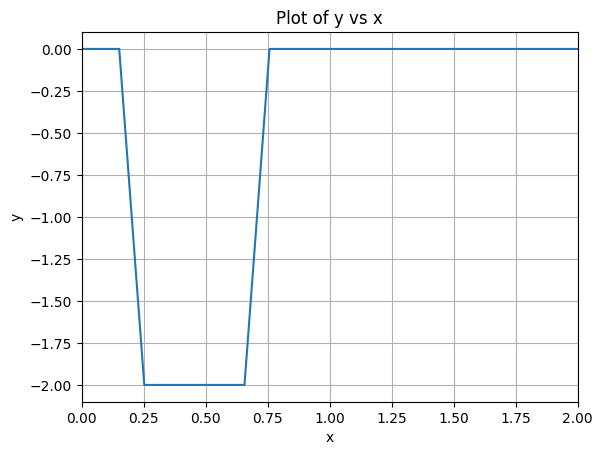

In [ ]:
def K(x):
    return H(x + .5) - H(x - .5)

def H(x):
    return np.where(x > 0, np.ones_like(x), np.zeros_like(x))

def derivative(x):
    e = .5
    theta = .5
    return (-1/e) * K((x - theta) / e)

import matplotlib.pyplot as plt
import numpy as np

def plot(x, y):
    plt.plot(x, y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Plot of y vs x')
    plt.grid()
    plt.xlim(0, 2)
    plt.show()

x = np.linspace(-5, 5, 100)
y = derivative(x)
plot(x, y)


In [ ]:
(batchsize nlayer dfeature), (nlayer dfeatures dacts) -> (batchsize nlayer dacts)


batch tolayer dacts = 

for n in fromlayer:
    for f in dfeatures:
        add acts[batch nlayers f] * W_dec[n tolayer f dacts] * mask[fromlayer tolayer]

In [ ]:
t = torch.triu(torch.ones(12, 12))
t[0, 6] = 6
t

tensor([[1., 1., 1., 1., 1., 1., 6., 1., 1., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [ ]:
import torch

a = torch.randint(0, 10, (3, 4))
b = torch.randint(0, 10, (4, 5))
a, b

(tensor([[3, 1, 1, 7],
         [3, 6, 0, 1],
         [5, 7, 6, 2]]),
 tensor([[7, 2, 3, 1, 0],
         [3, 9, 7, 2, 6],
         [9, 4, 5, 3, 0],
         [8, 6, 3, 9, 8]]))

In [ ]:
from einops import einsum

einsum(a, b, 'a b, c d -> a b d')

tensor([[[ 81,  63,  54,  45,  42],
         [ 27,  21,  18,  15,  14],
         [ 27,  21,  18,  15,  14],
         [189, 147, 126, 105,  98]],

        [[ 81,  63,  54,  45,  42],
         [162, 126, 108,  90,  84],
         [  0,   0,   0,   0,   0],
         [ 27,  21,  18,  15,  14]],

        [[135, 105,  90,  75,  70],
         [189, 147, 126, 105,  98],
         [162, 126, 108,  90,  84],
         [ 54,  42,  36,  30,  28]]])

res[a b d] = 
    for j in range(c):
        add a[a, b] * b[c, d]

In [ ]:
torch.tril(torch.ones(12, 12))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
# make two small example tensors
x = torch.randn(2, 4, 3)
y = torch.ones(3, 4) * 2
x, y

(tensor([[[ 0.1049,  0.6891, -0.2221],
          [-0.6869, -1.8075,  1.1821],
          [ 1.9893, -0.8786,  1.2487],
          [ 0.9046,  0.4721, -0.8072]],
 
         [[ 0.4983,  0.7082,  0.0465],
          [ 0.3724,  0.8592, -0.3992],
          [-0.5043,  0.9919, -1.5528],
          [-1.2314, -0.1028,  0.0340]]]),
 tensor([[2., 2., 2., 2.],
         [2., 2., 2., 2.],
         [2., 2., 2., 2.]]))

In [ ]:
x @ y

tensor([[[ 1.1438,  1.1438,  1.1438,  1.1438],
         [-2.6246, -2.6246, -2.6246, -2.6246],
         [ 4.7188,  4.7188,  4.7188,  4.7188],
         [ 1.1390,  1.1390,  1.1390,  1.1390]],

        [[ 2.5060,  2.5060,  2.5060,  2.5060],
         [ 1.6648,  1.6648,  1.6648,  1.6648],
         [-2.1303, -2.1303, -2.1303, -2.1303],
         [-2.6004, -2.6004, -2.6004, -2.6004]]])

In [ ]:
torch.matmul(x, y)

tensor([[[ 1.1438,  1.1438,  1.1438,  1.1438],
         [-2.6246, -2.6246, -2.6246, -2.6246],
         [ 4.7188,  4.7188,  4.7188,  4.7188],
         [ 1.1390,  1.1390,  1.1390,  1.1390]],

        [[ 2.5060,  2.5060,  2.5060,  2.5060],
         [ 1.6648,  1.6648,  1.6648,  1.6648],
         [-2.1303, -2.1303, -2.1303, -2.1303],
         [-2.6004, -2.6004, -2.6004, -2.6004]]])

In [ ]:
from einops import einsum

einsum(x, y, 'a b c, c d -> a b d')

tensor([[[ 1.1438,  1.1438,  1.1438,  1.1438],
         [-2.6246, -2.6246, -2.6246, -2.6246],
         [ 4.7188,  4.7188,  4.7188,  4.7188],
         [ 1.1390,  1.1390,  1.1390,  1.1390]],

        [[ 2.5060,  2.5060,  2.5060,  2.5060],
         [ 1.6648,  1.6648,  1.6648,  1.6648],
         [-2.1303, -2.1303, -2.1303, -2.1303],
         [-2.6004, -2.6004, -2.6004, -2.6004]]])